<center> <h1>  Group Uranus - Phase 2 Project </h1> </center>


<center> <img src="./images/skyline.jpeg" alt="King County Skyline" width="800"/> </center>

<center> <h2> Contributors:  Brad Blackwood, Ashley Eakland and Jalen Charles </h2> </center>

### Project Proposal: A user-friendly tool to predict pricing of homes using just a few key metrics, accomplished using multiple linear regression analysis.


### Business Understanding
##### Utilizing the CRISP-DM process, it is our goal with this project to present to both home buyers and sellers a user friendly tool to accurately predict the price of a home based on a few key metrics. The first step in this process is understanding the business, which in this case would be the consumer benefit of having a user friendly tool for home price predictions. Having an easily accessible and user friendly tool would enable the every day consumer to roughly estimate the price of a home without the need for extensive research or external support.

### Data Understanding and Preparation
##### For this analysis, and the second and third steps of the CRISP-DM process, we will gain a better understanding of our dataset. Being that this is a dataset of home sales data, it will be incredibly useful in the development of a home sales price prediction tool. Utilizing the column names and descriptions below, as well as the following code blocks, we discovered the following:

* This is a dataset of home sales in King County, Washington containing over unique 21,500 home sale data points.
* Data includes:
    * `id` - Unique ID number for a home
    * `date` - Date home was sold - this dataset contains sales from May 2014 through May 2015
    * `price` - Sale price - which is our prediction target for this project
    * `bedrooms` - Number of bedrooms in the home
    * `bathrooms` - Number of bathrooms in the home
    * `sqft_living` - Square footage of living space in the home
    * `sqft_lot` - Square footage of the lot 
    * `floors` - Number of floors (levels) in the home
    * `waterfront` - Whether the home is on a waterfront, represented as `YES` or `NO` (includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts)
    * `view` - Quality of view from the home ranked from `NONE` to `EXCELLENT` (includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other)
    * `condition` - How good the overall condition of the house is. Related to maintenance of house and ranked 1 through 5 with 1 being `Poor` and 5 being `Very Good` (see the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) breakdown of each condition rating specifics.)
    * `grade` - Overall grade of the house. Related to the construction and design of the house and rated 1 through 13 with 1 being short of minimum building standards and 13 being custom designed and built or "mansion" quality (see the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for breakdown of what each grade covers specifically)
    * `sqft_above` - Square footage of house above ground level/separate from the basement
    * `sqft_basement` - Square footage of the basement
    * `yr_built` - Year when house was built
    * `yr_renovated` - Year when house was renovated, if applicable
    * `zipcode` - ZIP Code used by the United States Postal Service
    * `lat` - Latitude coordinate
    * `long` - Longitude coordinate
    * `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
    * `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors
    


* Preliminary analysis shows strongest correlation with prediction target feature (`price`) in the `sqft_living` column. This will be our focus feature.
* Null values are seen in few columns in this dataset, with affected columns only being `waterfront`, `view`, and `yr_renovated`. Further data analysis renders these columns irrelevant to our end goal of a simple tool with minimal user input, and thus no preparation or futher investigation into these nulls needed.
* Zip Codes are targeted as an important predictor into a homes value - as they say, "location, location, location!". However, Zip Codes are categorical (or a discrete variable), and therefore need to be handled differently than a continuous variable in order to be modeled. We opted to utilize Pandas pd.get_dummies to One Hot Encode the Zip Codes. 
* Grades are also determined to be a potentially valuable predictor but that is also discrete. We prepared this data utilizing OHE as well, should we decide to proceed with grades in a final model. It was decided to omit them as an everyday consumer may not be able to accurately "grade" their home on the grading scale of 1 to 13 and input that into the tool, and therefore may not be the best choice for the end product of this project if we are able to produce an accurate model without the grade feature.
* With the idea of a tool in mind, and through model iteration described in the Modeling section below, we limit our data to the `zipcodes`, `bedrooms`, `bathrooms`, and `sqft_living`.
* EDA reveals below basic stats for target metric and predictors 
     
    * Price
        * Mean Price: \$540,510
        * Median Price: \$450,000
        
    * Square Footage
        * Mean: 2080 ft²
        * Median: 1910 ft²
        * Mode: 1300 ft²

    * Bedrooms
        * Mean: 3.37 
        * Median: 3
        * Mode : 3

    * Bathrooms
        * Mean: 2.12 
        * Median: 2.25
        * Mode: 2.5

* Lat/Long were used to plot the Zip Codes on an interactive map utilizing the Folium library, that then pulled in the median home price for that respective Zip Code. 
* Data preparation is complete and ready for modeling.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.api import OLS
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder

In [54]:
df = pd.read_csv('data/kc_house_data.csv', index_col='id')

In [55]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

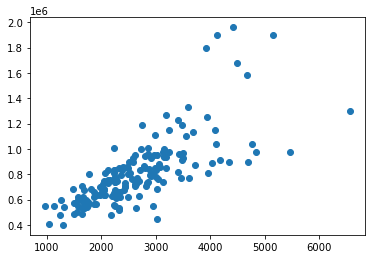

In [56]:
y = df[df['zipcode'] == 98005]['price']
x = df[df['zipcode'] == 98005]['sqft_living']

plt.scatter(x, y)

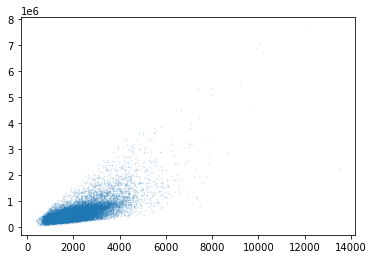

In [57]:
# sqft_living
# price

x = df['sqft_living']
y = df['price']

plt.scatter(x, y, alpha = .15, s= .4)

In [58]:
df[df['zipcode'] == 98005].corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.293229,0.602608,0.740920,0.566596,0.435987,0.777308,0.427175,0.098636,NaN,0.529695,0.198970,0.674625,0.397516
bedrooms,0.293229,1.000000,0.362850,0.545460,0.299922,0.084771,0.302207,0.026695,-0.081983,NaN,0.218388,0.143646,0.275105,0.222452
bathrooms,0.602608,0.362850,1.000000,0.716835,0.383228,0.478232,0.620989,0.550833,0.041331,NaN,0.387685,0.226978,0.536440,0.345951
sqft_living,0.740920,0.545460,0.716835,1.000000,0.510779,0.426776,0.786090,0.401876,0.004121,NaN,0.499581,0.185618,0.658809,0.403712
sqft_lot,0.566596,0.299922,0.383228,0.510779,1.000000,0.321917,0.504037,0.166455,-0.013749,NaN,0.611847,0.283477,0.600156,0.619629
floors,0.435987,0.084771,0.478232,0.426776,0.321917,1.000000,0.652533,0.620710,-0.102883,NaN,0.388322,0.342794,0.418034,0.221950
sqft_above,0.777308,0.302207,0.620989,0.786090,0.504037,0.652533,1.000000,0.454368,0.079430,NaN,0.546579,0.259574,0.696711,0.399360
yr_built,0.427175,0.026695,0.550833,0.401876,0.166455,0.620710,0.454368,1.000000,-0.211315,NaN,0.238243,0.361009,0.318313,0.161520
yr_renovated,0.098636,-0.081983,0.041331,0.004121,-0.013749,-0.102883,0.079430,-0.211315,1.000000,NaN,0.040105,-0.041954,-0.081255,0.020770
zipcode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

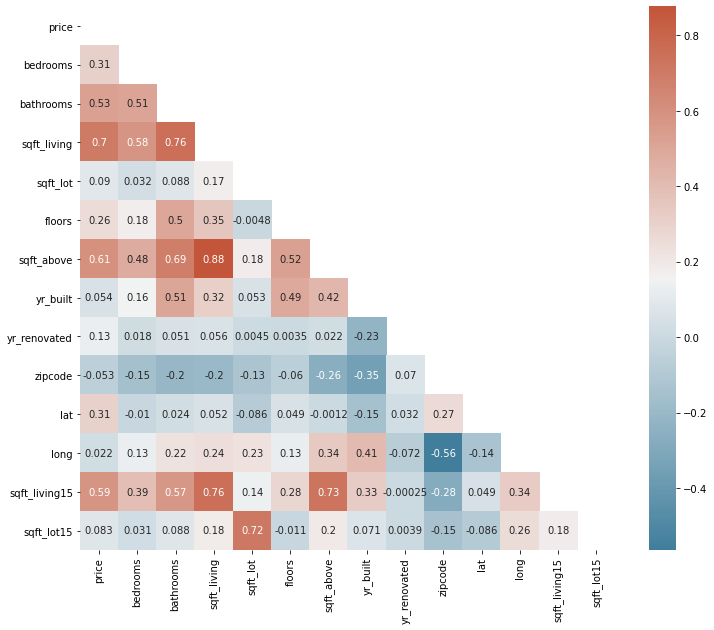

In [59]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [60]:
zipcodes = pd.get_dummies(df.zipcode)
zip_cat = pd.concat([df, zipcodes], axis=1) # df with OHE by zipcode # no dropped columns

In [61]:
box_df = zip_cat.copy()
box_df = box_df[['price', 'bedrooms', 'bathrooms', 'sqft_living']]
box_df.head()

,price,bedrooms,bathrooms,sqft_living
id,,,,
7129300520,221900.0,3,1.00,1180
6414100192,538000.0,3,2.25,2570
5631500400,180000.0,2,1.00,770
2487200875,604000.0,4,3.00,1960
1954400510,510000.0,3,2.00,1680


/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


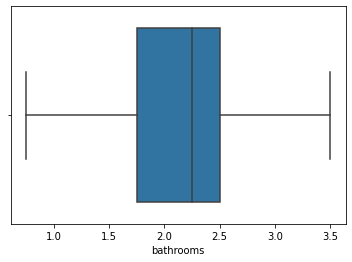

In [62]:
import seaborn as sns
sns.boxplot(box_df['bathrooms'], showfliers=False);


/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


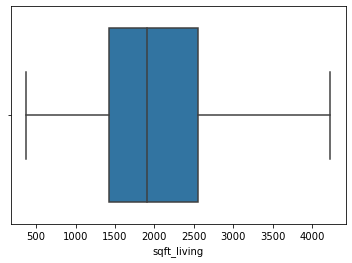

In [63]:
sns.boxplot(box_df['sqft_living'], showfliers=False);

/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


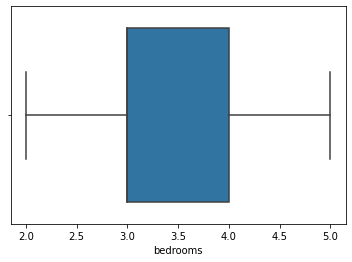

In [64]:
sns.boxplot(box_df['bedrooms'],showfliers=False);

/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


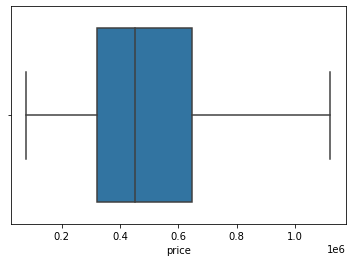

In [65]:
from matplotlib.ticker import ScalarFormatter
ax = sns.boxplot(box_df['price'],showfliers=False);
# plt.ticklabel_format(style='plain')

* DataFrames used throughout the notebook and their contents

In [66]:
# zip_cat -- Entire df + Zipcode(OHE)
# zip_price -- Price + Sqft_living + Zipcode(OHE)
# grade_cat -- Price + Sqft_living + Zipcode(OHE) + Grade(OHE)

### Modeling

The aims of our modeling process was to **maximize accuracy** while **minimizing the inputs**. Decreasing the complexity of the model helps to decrease colinearity and make for a better user experience of our product. We apporach model developement with an itterativly to indentify the best features for our use case.

Target feature - **Price**

Key feature - **Squarefoot Living Space** (this was identified above with a correlation heat map)

##### Complimentary features tested

* Zipcodes
* Bedrooms
* Bathroom
* Bedrooms/Bathroom
* Bathrooms/Bedrooms
* Grade


##### Model Selected included Squarefootage, Zipcode, Bedrooms, and Bathrooms as features.
We tested the our models graphically to determine its performace as it relates to its predicted price.

* This showed that are model has a higher tendency for error as the actual price of the home is lower.
* Most likely this is because other features of lower priced home are stronger predictors of its price. When using our model this is something to be aware of. 
* Our model is best at giving an intial estimate of home price and users should consider other means to confirm/increase confidence before purchasing/selling their home.

##### Feature Impacts
* The Squarefootage feature of our models suggest that price per square foot in King County is ~ $275.

* The Bathroom feature of our models suggest that price per bathroom in King County is ~ $12,000.

##### Future Improvements 
* Incorporating other commonly available home features (ie. parking, hoa, condition, heating/cooling, home type, neighborhood safety, school district) could potential increase the accuracy of the model. 
* Polynomial regression could also be experimented with using available data.
* Using our what is known about our model accuracy we could also develope a function to suggest potential zipcodes that would meet a home specification in their desired budget. 


In [67]:
# SIMPLE LINEAR REGRESSION (X = SQFT, Y = PRICE)

lr = LinearRegression()

x1 = np.array(df['sqft_living']).reshape(-1, 1) # reshape required for single feature
y1 = df['price']

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=.2)

lr.fit(x1_train, y1_train)

lr.score(x1_test, y1_test)

# LOW R2 ~0.47

0.49790074556390007

In [68]:
# MODELED USING X = ZIPCODES(OHE), Y = PRICE

x2 = zipcodes
y2 = df.price

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=.2)

lr.fit(x2_train, y2_train)

lr.score(x2_test, y2_test)

# LOW R2 ~0.44

0.384649621870535

In [69]:
# MULTIPLE LINEAR REGREESSION INCLUDING X = SQFT + ZIPCODES(OHE), Y = PRICE

zip_price = pd.concat([df.price, df.sqft_living, zipcodes], axis=1)

y3 = zip_price.price
x3 = zip_price.drop('price', axis=1)

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=.2)

lr.fit(x3_train, y3_train)

lr.score(x3_test, y3_test) 

# TOGETHER SQUARE FOOTAGE AND ZIPCODES CORRELATE MUCH BETTER TO SALE PRICE
# R2 ~ .72

0.7349194320669279

In [70]:
# MULTIPLE LINEAR REGREESSION INCLUDING X = SQFT + ZIPCODES(OHE) + GRADE(OHE), Y = PRICE

grade_cat = pd.concat([zip_price, pd.get_dummies(df.grade)], axis=1)

y4 = grade_cat.price
x4 = grade_cat.drop('price', axis=1)

x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=.2)

lr.fit(x4_train, y4_train)

lr.score(x4_test, y4_test) 

# ADDITION OF GRADE OF HOME IMPROVES THE MODEL
# R2 ~ 0.78

# GRADE NOT STRAIGHTFORWARD FOR USER INPUT

0.782162474522237

In [71]:
# OLS PRINTOUT OF 4TH ITTERATIVE MODEL

price = y4_train
preds = x4_train
test_lm1 = OLS(price,preds)
results = test_lm1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     773.1
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        13:18:54   Log-Likelihood:            -2.3261e+05
No. Observations:               17277   AIC:                         4.654e+05
Df Residuals:                   17196   BIC:                         4.660e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     170.5445      2.289     74.507      0.000     166.058     175.031
98001         -1.404e+05   1.04e+04    -13.463      0.000   -1.61e+05    -1.2e+05
98002         -1.278e+05   1.37e+04     -9.335      0.000   -1.55e+05   -1.01e+05
98003         -1.343e+05   1.16e+04    -11.591      0.000   -1.57e+05   -1.12e+05
98004          6.058e+05    1.1e+04     55.213      0.000    5.84e+05    6.27e+05
98005          1.705e+05   1.56e+04     10.959      0.000     1.4e+05    2.01e+05
98006            1.2e+05   8959.622     13.398      0.000    1.02e+05    1.38e+05
98007          1.082e+05   1.58e+04      6.860      0.000    7.73e+04    1.39e+05
98008          1.643e+05   1.16e+04     14.185      0.000    1.42e+05    1.87e+05
98010         -6.181e+04   1.87e+04     -3.300      0.001   -9.85e+04   -2.51e+04
98011         -1.043e+04   1.39e+04     -0.748      0.454   -3.78e+04    1.69e+04
98014         -3.273e+04   1.72e+04     -1.904      0.057   -6.64e+04     970.662
98019         -5.126e+04    1.4e+04     -3.650      0.000   -7.88e+04   -2.37e+04
98022          -9.44e+04   1.25e+04     -7.547      0.000   -1.19e+05   -6.99e+04
98023         -1.662e+05   8979.642    -18.507      0.000   -1.84e+05   -1.49e+05
98024          2.769e+04   2.11e+04      1.311      0.190   -1.37e+04    6.91e+04
98027          2.273e+04   9677.750      2.349      0.019    3764.456    4.17e+04
98028         -7596.8769   1.16e+04     -0.653      0.514   -3.04e+04    1.52e+04
98029          6.877e+04   1.06e+04      6.472      0.000    4.79e+04    8.96e+04
98030         -1.384e+05   1.21e+04    -11.417      0.000   -1.62e+05   -1.15e+05
98031          -1.24e+05   1.18e+04    -10.547      0.000   -1.47e+05   -1.01e+05
98032         -1.345e+05    1.7e+04     -7.909      0.000   -1.68e+05   -1.01e+05
98033          2.363e+05   9569.643     24.694      0.000    2.18e+05    2.55e+05
98034          6.772e+04   8506.477      7.961      0.000     5.1e+04    8.44e+04
98038         -1.077e+05   8305.794    -12.968      0.000   -1.24e+05   -9.14e+04
98039          1.149e+06   3.02e+04     38.097      0.000    1.09e+06    1.21e+06
98040           4.13e+05   1.17e+04     35.357      0.000     3.9e+05    4.36e+05
98042         -1.276e+05   8525.556    -14.963      0.000   -1.44e+05   -1.11e+05
98045         -2.899e+04   1.29e+04     -2.247      0.025   -5.43e+04   -3696.242
98052          9.993e+04   8488.249     11.773      0.000    8.33e+04    1.17e+05
98053          6.456e+04   9929.492      6.502      0.000    4.51e+04     8.4e+04
98055         -9.276e+04   1.17e+04     -7.906      0.000   -1.16e+05   -6.98e+04
98056         -3.589e+04   9754.555     -3.679      0.000    -5.5e+04   -1.68e+04
98058         -1.047e+05   9395.546    -11.142      0.000   -1.23e+05   -8.63e+04
98059         -5.687e+04   9148.497     -6.217   

In [72]:
# Model Choosen

# X = SQFT_LIVING, ZIPCODES(OHE), BEDROOMS, BATHROOMS
# Y = PRICE
#def choosen_model():
y6 = df.price
x6 = pd.concat([df.sqft_living, df.bedrooms, df.bathrooms, zipcodes], axis=1)

x6_train, x6_test, y6_train, y6_test = train_test_split(x6, y6, test_size=.2)

lr.fit(x6_train, y6_train)

lr.score(x6_test, y6_test)
    

#choosen_model()

# R2 ~ 0.74

0.7312342155834044

In [73]:
# OLS PRINTOUT OF ABOVE MODEL

price = y6_train
preds = x6_train
test_lm1 = OLS(price,preds)
results = test_lm1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     679.7
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        13:18:55   Log-Likelihood:            -2.3426e+05
No. Observations:               17277   AIC:                         4.687e+05
Df Residuals:                   17204   BIC:                         4.692e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   273.9427      2.657    103.104      0.000     268.735     279.151
bedrooms    -4.367e+04   1920.487    -22.738      0.000   -4.74e+04   -3.99e+04
bathrooms    7981.5182   2928.274      2.726      0.006    2241.803    1.37e+04
98001       -1.065e+05   1.24e+04     -8.589      0.000   -1.31e+05   -8.22e+04
98002       -7.942e+04   1.58e+04     -5.033      0.000    -1.1e+05   -4.85e+04
98003       -1.038e+05   1.38e+04     -7.536      0.000   -1.31e+05   -7.68e+04
98004         7.05e+05   1.34e+04     52.692      0.000    6.79e+05    7.31e+05
98005        2.303e+05   1.78e+04     12.923      0.000    1.95e+05    2.65e+05
98006         2.13e+05   1.15e+04     18.503      0.000     1.9e+05    2.36e+05
98007        1.657e+05   1.84e+04      9.013      0.000     1.3e+05    2.02e+05
98008        2.182e+05   1.42e+04     15.367      0.000     1.9e+05    2.46e+05
98010        -3.26e+04   2.16e+04     -1.513      0.130   -7.49e+04    9646.386
98011        1.228e+04    1.6e+04      0.770      0.441    -1.9e+04    4.35e+04
98014       -2.575e+04      2e+04     -1.288      0.198   -6.49e+04    1.34e+04
98019       -4.257e+04   1.57e+04     -2.715      0.007   -7.33e+04   -1.18e+04
98022       -5.757e+04   1.47e+04     -3.906      0.000   -8.65e+04   -2.87e+04
98023       -1.251e+05   1.09e+04    -11.472      0.000   -1.46e+05   -1.04e+05
98024        6.668e+04   2.37e+04      2.808      0.005    2.01e+04    1.13e+05
98027        6.756e+04   1.23e+04      5.495      0.000    4.35e+04    9.17e+04
98028        2.275e+04   1.36e+04      1.668      0.095   -3977.674    4.95e+04
98029        1.142e+05   1.31e+04      8.722      0.000    8.85e+04     1.4e+05
98030       -1.053e+05   1.42e+04     -7.405      0.000   -1.33e+05   -7.74e+04
98031       -8.465e+04   1.41e+04     -6.005      0.000   -1.12e+05    -5.7e+04
98032       -8.309e+04      2e+04     -4.151      0.000   -1.22e+05   -4.39e+04
98033        2.796e+05    1.2e+04     23.218      0.000    2.56e+05    3.03e+05
98034        1.089e+05   1.06e+04     10.235      0.000    8.81e+04     1.3e+05
98038       -9.254e+04   1.05e+04     -8.778      0.000   -1.13e+05   -7.19e+04
98039        1.234e+06   2.99e+04     41.287      0.000    1.18e+06    1.29e+06
98040         4.81e+05   1.44e+04     33.325      0.000    4.53e+05    5.09e+05
98042       -1.023e+05   1.07e+04     -9.566      0.000   -1.23e+05   -8.14e+04
98045       -7954.6016   1.52e+04     -0.522      0.602   -3.78e+04    2.19e+04
98052        1.389e+05   1.07e+04     13.011      0.000    1.18e+05     1.6e+05
98053        8.038e+04    1.2e+04      6.677      0.000    5.68e+04    1.04e+05
98055       -6.058e+04   1.37e+04     -4.416      0.000   -8.75e+04   -3.37e+04
98056        2838.2943   1.18e+04      0.241      0.809   -2.02e+04    2.59e+04
98058       -6.985e+04   1.13e+04     -6.18

In [74]:
def price_predictor():
    
    #choosen_model()
    
    beds = int(input('How many bedrooms?'))
    baths = float(input('How many bathrooms?'))
    sqft = int(input('How many square feet?'))
    zip_ = int(input('What is the zipcode?'))
    
    entry = pd.DataFrame(0, index=['sample'], columns=x6.columns)
    entry['bedrooms'] = beds
    entry['bathrooms'] = baths
    entry['sqft_living'] = sqft
    entry[zip_] = 1
    
    price_target = f'${round(float(lr.predict(entry)), 2)}'
    return price_target

price_predictor()

How many bedrooms?1
How many bathrooms?1
How many square feet?750
What is the zipcode?98117


'$399107.53'

actual price = $349000
predicted price = $355715.04


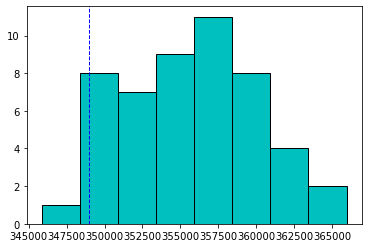

In [75]:
import random
import seaborn as sns

def rep_model(x, y, reps=10):

    random_index = random.randint(0, x.shape[0])

    random_x = x.sample(random_state=random_index, axis=0)
    random_y = y.sample(random_state=random_index, axis=0)
    
    guesses = []
    
    for i in range(reps):
        
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)
        lr.fit(x_train, y_train)
        guesses.append(int(lr.predict(random_x)))
    
    print(f'actual price = ${int(random_y.values)}')
    print(f'predicted price = ${np.mean(guesses)}')
    
    plt.hist(x=guesses, bins=8, color='c', edgecolor='k')
    plt.axvline(random_y.values, color='b', linestyle='dashed', linewidth=1);
    
    return
    
rep_model(x6, y6, reps=50)

In [76]:
bed_bath = x6['bedrooms']/x6['bathrooms'] # CREATING RATIO FOR MODEL
calc_df = pd.concat([zip_price, bed_bath], axis=1)
calc_df.rename(columns={0: 'bed_over_bath'}, inplace=True)
# calc_df.corr()

# bed/bath has slight neg corr to price and sqft ~ -0.24, -0.32
# possibly try bath/bed

x10 = calc_df.drop('price', axis=1)
y10 = calc_df.price

x10_train, x10_test, y10_train, y10_test = train_test_split(x10, y10, test_size=.2)

lr.fit(x10_train, y10_train)

lr.score(x10_test, y10_test)

# R2 ~ 0.73

0.7419964263881298

In [77]:
bath_bed = x6['bathrooms']/x6['bedrooms'] # CREATING RATIO FOR MODEL 
calc_df2 = pd.concat([zip_price, bed_bath], axis=1)
calc_df2.rename(columns={0: 'bath_bed'}, inplace=True)

# calc_df2.corr()

# same corr as above ~ -0.24, -0.32

x11 = calc_df2.drop('price', axis=1)
y11 = calc_df2.price

x11_train, x11_test, y11_train, y11_test = train_test_split(x11, y11, test_size=.2)

lr.fit(x11_train, y11_train)

lr.score(x11_test, y11_test)

# R ~ 0.73

# no difference between testing variable independently or either ratio

0.737290325013779

In [78]:
# MODEL WITH BEDROOMS VARIABLE EXCLUDED 

x12 = pd.concat([df.sqft_living, df.bathrooms, zipcodes], axis=1)
y12 = df.price

x12_train, x12_test, y12_train, y12_test = train_test_split(x12, y12, test_size=.2)

lr.fit(x12_train, y12_train)

lr.score(x12_test, y12_test)

0.716945383057273

In [79]:
# ABOVE IS CLEAN

In [80]:
np.random.seed(42)
sample_pt = zip_cat.sample(1)
sample_pt_price = zip_cat.iloc[0,1]
sample = sample_pt.drop(['price', 'date', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
                   'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
                   'sqft_living15', 'sqft_lot15'], axis=1)

# Show my random sample off
print(f'Price of sample: ${sample_pt_price}')
sample

Price of sample: $221900.0


,bedrooms,bathrooms,sqft_living,98001,98002,98003,98004,98005,98006,98007,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
id,,,,,,,,,,,,,,,,,,,,,
6303401050,3,0.75,850,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [81]:
#Code from Model Validation lecture as a guide for this function.
def train_lr_randomly(data, sample_pt=None, ntimes=100):
    
    rmse = []
    r2 = []
    point_predictions = [] if (sample_pt is not None) else None
    y7 = data.price
    x7 = data.drop(['price', 'date', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
                       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
                       'sqft_living15', 'sqft_lot15'], axis=1)
    lr7 = LinearRegression()

    for i in range(ntimes):
        x7_train, x7_test, y7_train, y7_test = train_test_split(x7, y7, test_size=.2)
        lr7.fit(x7_train, y7_train)
        y_hat = lr7.predict(x7_test)
        rmse.append(np.sqrt(mean_squared_error(y7_test, y_hat)))
        r2.append(lr7.score(x7_test, y7_test))

        if sample_pt is not None:
            y_hat_pt = lr7.predict(sample_pt)
            point_predictions.append(y_hat_pt[0])
                  
    return rmse, r2, point_predictions

In [82]:
#x axis actual prices, y axis normalize predictions
def train_lr_randomly(data, sample_pt=None, ntimes=100):
    
    rmse = []
    r2 = []
    point_predictions = [] if (sample_pt is not None) else None
    y7 = data.price
    x7 = data.drop(['price', 'date', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
                       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
                       'sqft_living15', 'sqft_lot15'], axis=1)
    lr7 = LinearRegression()
    
    x_axis = [] # actual price
    y_axis = [] # % error

    for i in range(ntimes):
        x7_train, x7_test, y7_train, y7_test = train_test_split(x7, y7, test_size=.2)
        lr7.fit(x7_train, y7_train)
        
        y_hat = lr7.predict(x7_test)
        
        x_axis.append(y7_test)
        y_axis.append((y_hat-y7_test)/y7_test)# predicted price - acutal price / actual price
        
        plt.scatter(x_axis, y_axis, s=.1, alpha=.2)
        plt.xlim(0,1000000)
        plt.ylim(-1, 1)
        
        rmse.append(np.sqrt(mean_squared_error(y7_test, y_hat)))
        r2.append(lr7.score(x7_test, y7_test))

        if sample_pt is not None:
            y_hat_pt = lr7.predict(sample_pt)
            point_predictions.append(y_hat_pt[0])
                  
    return rmse, r2, point_predictions

([189953.19130218693,
  186514.02753558347,
  184994.9046252009,
  178841.85522192065,
  184682.2091718215],
 [0.7446244605381866,
  0.738554623711146,
  0.7428759158052647,
  0.7298955130556406,
  0.7541472762742041],
 [155287.328125,
  138842.1953125,
  143476.57421875,
  138366.9609375,
  140761.326171875])

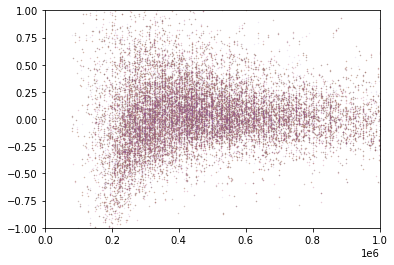

In [83]:
train_lr_randomly(data=zip_cat,sample_pt=sample, ntimes=5)

In [84]:
zip_cat.price.median()

450000.0

In [85]:
y7 = zip_cat.price
x7 = zip_cat.drop(['price', 'date', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
                       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
                       'sqft_living15', 'sqft_lot15'], axis=1)
x7_train, x7_test, y7_train, y7_test = train_test_split(x7, y7, test_size=.2)


linreg = LinearRegression()
linreg.fit(x7_train, y7_train)
y_hat_train = linreg.predict(x7_train)
y_hat_test = linreg.predict(x7_test)
train_res = y_hat_train - y7_train
test_res = y_hat_test - y7_test
mse_train = mean_squared_error(y7_train, y_hat_train)
mse_test = mean_squared_error(y7_test, y_hat_test)
print(np.sqrt(mse_train))
print(np.sqrt(mse_test))

188010.57296709702
187923.48589631525


### Regression Results - Final Model
** This particular model was choosen due to the R2 of 74 % which accounts for 74 percent of the variance of our model. 

*The coefficients that were used to account for the varience when looking forprice were square foot living, Bathroom, and bedroom and zipcode(which was one hot encoded) 

*the coefficient sqft living was the most correlated with our target, price,  while bathroom and bedroom where similarly correlated with each other which could lead to some colinearity in our model 

*Zip codes while playing a factor led to a negativel correlated bedroom co-effecient due to the pricing of expensive housing with a lesser bedroom being located in certain zip codes and cheaper houses with more bedrooms located in other zip codes. A proximity scaler of some sort would be added in the future. 

*As a result the stake holder should utilize the model with a descretion and utilize other sources as well


In [86]:
import folium
location = df.groupby('zipcode')[['lat', 'long']].mean()
long = location['long']
lat = location['lat']
price = df.groupby('zipcode')['price'].median()
zip_1 = location.index

base_map = folium.Map([47.6, -122.25], zoom_start=11)

points = list(zip(lat, long, price, zip_1))
for p in points:
    lat = p[0]
    long = p[1]
    zip_1 = p[3]
    price = f'{zip_1} : ${str(p[2])}'
#     marker = folium.Marker(location=[lat, long])
    popup = folium.Popup(price, parse_html=True)
    
    marker = folium.Marker(location=[lat, long], popup=popup)
    marker.add_to(base_map)
    
#     marker.add_to(base_map)

base_map

# long